<a href="https://colab.research.google.com/github/ai7dnn/2020-Winter-Py-DNN/blob/main/tf%20code/12W_cnn_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# %matplotlib inline
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
image = np.array([[[1,2,3],
                   [4,5,6], 
                   [7,8,9]]], dtype=np.float32)
image.shape

(1, 3, 3)

In [ ]:
# 4차원의 행렬로 변환
image = image.reshape(-1, 3, 3, 1)
'''
image = np.array([[[[1],[2],[3]],
                   [[4],[5],[6]], 
                   [[7],[8],[9]]]], dtype=np.float32)
'''
image.shape

(1, 3, 3, 1)

[[[[1.]
   [2.]
   [3.]]

  [[4.]
   [5.]
   [6.]]

  [[7.]
   [8.]
   [9.]]]]


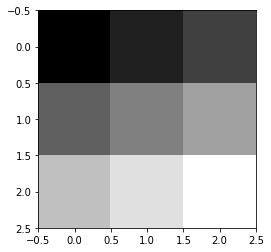

In [ ]:
print(image)
#plt.imshow(image.reshape(3,3), cmap='Greys')
plt.imshow(image.reshape(3,3), cmap='gray')

(1, 3, 3, 1)


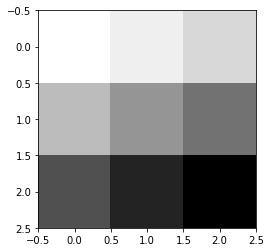

In [ ]:
image = np.array([[[[1],[2],[3]],
                   [[4],[5],[6]], 
                   [[7],[8],[9]]]], dtype=np.float32)
print(image.shape)
plt.imshow(image.reshape(3,3), cmap='Greys')

In [ ]:
print(image)

[[[[1.]
   [2.]
   [3.]]

  [[4.]
   [5.]
   [6.]]

  [[7.]
   [8.]
   [9.]]]]


## 1 filter (2,2,1,1) with padding: VALID

weight.shape = 1 filter (2 , 2 , 1, 1)
![image](https://cloud.githubusercontent.com/assets/901975/24833375/c0d9c262-1cf9-11e7-9efc-5dd6fe0fedb0.png)

In [ ]:
image = np.array([[[[1],[2],[3]],
                   [[4],[5],[6]], 
                   [[7],[8],[9]]]], dtype=np.float32)
print("image.shape", image.shape)

# wight가 커널
weight = tf.constant([[[[1.]],[[1.]]],
                      [[[1.]],[[1.]]]])
print("weight.shape", weight.shape)

conv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding='VALID')
print("conv2d.shape", conv2d.shape)

conv2d_img = np.swapaxes(conv2d, 0, 3)
print("conv2d_img.shape", conv2d_img.shape)
print(type(conv2d_img))
print(conv2d_img)

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 1)
conv2d.shape (1, 2, 2, 1)
conv2d_img.shape (1, 2, 2, 1)
<class 'numpy.ndarray'>
[[[[12.]
   [16.]]

  [[24.]
   [28.]]]]


[[12. 16.]
 [24. 28.]]


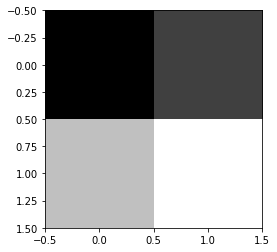

In [ ]:
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(2,2))
    plt.subplot(1, 1, i+1)
    plt.imshow(one_img.reshape(2,2), cmap='gray')

In [ ]:
x_in = np.array([[
  [[2], [1], [2], [0], [1]],
  [[1], [3], [2], [2], [3]],
  [[1], [1], [3], [3], [0]],
  [[2], [2], [0], [1], [1]],
  [[0], [0], [3], [1], [2]], ]])
x = tf.constant(x_in, dtype=tf.float32)
print(x.shape)

# 2 x 2 커널 2개 적용
kernel_in = np.array([
 [ [[2, 0.1]],[[3, 0.2]] ],
 [ [[0, 0.3]],[[1, 0.4]] ], ])
kernel = tf.constant(kernel_in, dtype=tf.float32)
print(kernel)

(1, 5, 5, 1)
tf.Tensor(
[[[[2.  0.1]]

  [[3.  0.2]]]


 [[[0.  0.3]]

  [[1.  0.4]]]], shape=(2, 2, 1, 2), dtype=float32)


In [ ]:
conv2d = tf.nn.conv2d(x, kernel, strides=[1, 1, 1, 1], padding='VALID')
print("conv2d.shape", conv2d.shape) #1, 4, 4, 2 = 채널, 가로, 세로, 특징 수
print(conv2d)

conv2d.shape (1, 4, 4, 2)
tf.Tensor(
[[[[10.         1.9000001]
   [10.         2.2      ]
   [ 6.         1.6      ]
   [ 6.         2.       ]]

  [[12.         1.4      ]
   [15.         2.2      ]
   [13.         2.7      ]
   [13.         1.7      ]]

  [[ 7.         1.7      ]
   [11.         1.3      ]
   [16.         1.3000001]
   [ 7.         1.       ]]

  [[10.         0.6      ]
   [ 7.         1.4      ]
   [ 4.         1.5      ]
   [ 7.         1.4000001]]]], shape=(1, 4, 4, 2), dtype=float32)


In [ ]:
# (1, 4, 4, 2) = 채널, 가로, 세로, 특징 수
# 채널과 특징을 교환하여 그림을 그리도록 하기 위해
conv2d_img = np.swapaxes(conv2d, 0, 3)
print("conv2d.shape", conv2d_img.shape) #2, 4, 4, 1 = 특징 수, 가로, 세로, 채널
print(conv2d_img)

conv2d.shape (2, 4, 4, 1)
[[[[10.       ]
   [10.       ]
   [ 6.       ]
   [ 6.       ]]

  [[12.       ]
   [15.       ]
   [13.       ]
   [13.       ]]

  [[ 7.       ]
   [11.       ]
   [16.       ]
   [ 7.       ]]

  [[10.       ]
   [ 7.       ]
   [ 4.       ]
   [ 7.       ]]]


 [[[ 1.9000001]
   [ 2.2      ]
   [ 1.6      ]
   [ 2.       ]]

  [[ 1.4      ]
   [ 2.2      ]
   [ 2.7      ]
   [ 1.7      ]]

  [[ 1.7      ]
   [ 1.3      ]
   [ 1.3000001]
   [ 1.       ]]

  [[ 0.6      ]
   [ 1.4      ]
   [ 1.5      ]
   [ 1.4000001]]]]


[[10. 10.  6.  6.]
 [12. 15. 13. 13.]
 [ 7. 11. 16.  7.]
 [10.  7.  4.  7.]]
[[1.9000001 2.2       1.6       2.       ]
 [1.4       2.2       2.7       1.7      ]
 [1.7       1.3       1.3000001 1.       ]
 [0.6       1.4       1.5       1.4000001]]


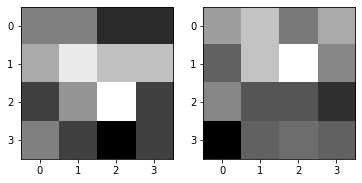

In [ ]:
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(4,4))
    plt.subplot(1,2,i+1), plt.imshow(one_img.reshape(4,4), cmap='gray')

## 1 filter (2,2,1,1) with padding:SAME
![image](https://cloud.githubusercontent.com/assets/901975/24833381/fd01869e-1cf9-11e7-9d59-df08c7c6e5c4.png)

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 1)
conv2d.shape (1, 3, 3, 1)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]


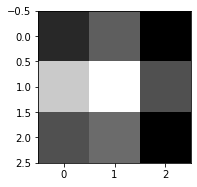

In [ ]:
image = np.array([[[[1],[2],[3]],
                   [[4],[5],[6]], 
                   [[7],[8],[9]]]], dtype=np.float32)
print("image.shape", image.shape)

weight = tf.constant([[[[1.]],[[1.]]],
                      [[[1.]],[[1.]]]])
print("weight.shape", weight.shape)

conv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding='SAME')
print("conv2d.shape", conv2d.shape)

conv2d_img = np.swapaxes(conv2d, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3,3))
    plt.subplot(1,2,i+1), plt.imshow(one_img.reshape(3,3), cmap='gray')

## 3 filters (2,2,1,3)

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 3)
conv2d.shape (1, 3, 3, 3)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]
[[120. 160.  90.]
 [240. 280. 150.]
 [150. 170.  90.]]
[[-12. -16.  -9.]
 [-24. -28. -15.]
 [-15. -17.  -9.]]


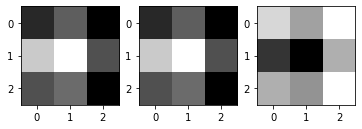

In [ ]:
image = np.array([[[[1],[2],[3]],
                   [[4],[5],[6]], 
                   [[7],[8],[9]]]], dtype=np.float32)
# print("imag:\n", image)
print("image.shape", image.shape)

weight = tf.constant([[[[1.,10.,-1.]],[[1.,10.,-1.]]],
                      [[[1.,10.,-1.]],[[1.,10.,-1.]]]])
print("weight.shape", weight.shape)

conv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding='SAME')
print("conv2d.shape", conv2d.shape)

conv2d_img = np.swapaxes(conv2d, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3,3))
    plt.subplot(1,3,i+1), plt.imshow(one_img.reshape(3,3), cmap='gray')

## MAX POOLING
![image](https://cloud.githubusercontent.com/assets/901975/23337676/bd154da2-fc30-11e6-888c-d86bc2206066.png)

![image](https://cloud.githubusercontent.com/assets/901975/23340355/a4bd3c08-fc6f-11e6-8a99-1e3bbbe86733.png)


In [ ]:
image = np.array([[[[4],[3]],
                    [[2],[1]]]], dtype=np.float32)
print(image.shape)
pool = tf.nn.max_pool(image, ksize=[1, 2, 2, 1],
                    strides=[1, 1, 1, 1], padding='VALID')
print(pool.shape)
print(pool.numpy())

(1, 2, 2, 1)
(1, 1, 1, 1)
[[[[4.]]]]


## SAME: Zero paddings

![image](https://cloud.githubusercontent.com/assets/901975/23340337/71b27652-fc6f-11e6-96ef-760998755f77.png)

In [ ]:
image = np.array([[[[4],[3]],
                    [[2],[1]]]], dtype=np.float32)
pool = tf.nn.max_pool(image, ksize=[1, 2, 2, 1],
                    strides=[1, 1, 1, 1], padding='SAME')
print(pool.shape)
print(pool.numpy())

(1, 2, 2, 1)
[[[[4.]
   [3.]]

  [[2.]
   [1.]]]]


# MNIST digits

In [2]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

mnist = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [13]:
len(mnist[0][0][0])

28

(28, 28)


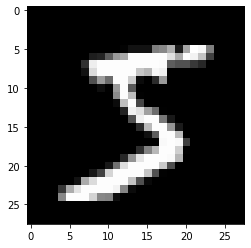

In [ ]:
# mnist[0][0][0]: 학습 데이터, 이미지 중, 첫번째  
img = mnist[0][0][0].reshape(28,28)
print(img.shape)
plt.imshow(img, cmap='gray')

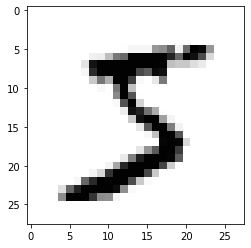

In [ ]:
plt.imshow(img, cmap='Greys')

(1, 14, 14, 5)


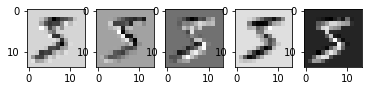

In [ ]:
# 4차원으로 확장
img = img.reshape(-1,28,28,1)
# 3 x 3의 필터 5개 생성
W1 = tf.Variable(tf.random.normal([3, 3, 1, 5], stddev=0.01))

#conv2d = tf.nn.conv2d(img, W1, strides=[1, 2, 2, 1], padding='SAME')
conv2d = tf.nn.conv2d(img, W1, strides=2, padding='SAME')
print(conv2d.shape)

conv2d_img = np.swapaxes(conv2d, 0, 3)
for i, one_img in enumerate(conv2d_img):
    plt.subplot(1,5,i+1)
    plt.imshow(one_img.reshape(14,14), cmap='gray')


(1, 7, 7, 5)


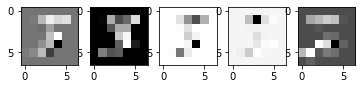

In [ ]:
pool = tf.nn.max_pool(conv2d, ksize=[1, 2, 2, 1], 
                      strides=[1, 2, 2, 1], padding='SAME')
print(pool.shape)

pool_img = np.swapaxes(pool, 0, 3)
for i, one_img in enumerate(pool_img):
    plt.subplot(1,5,i+1)
    plt.imshow(one_img.reshape(7, 7), cmap='gray')

In [ ]:
# end